# ASSIGNMENT 11: DECISION TREE

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Task 01: Data Preparation

In [3]:
data = pd.read_excel('heart_disease.xlsx',  sheet_name = 'Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


# Task 02: Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
data.shape

(908, 13)

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [5]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

# <b> Visualization </b>

* Histogram

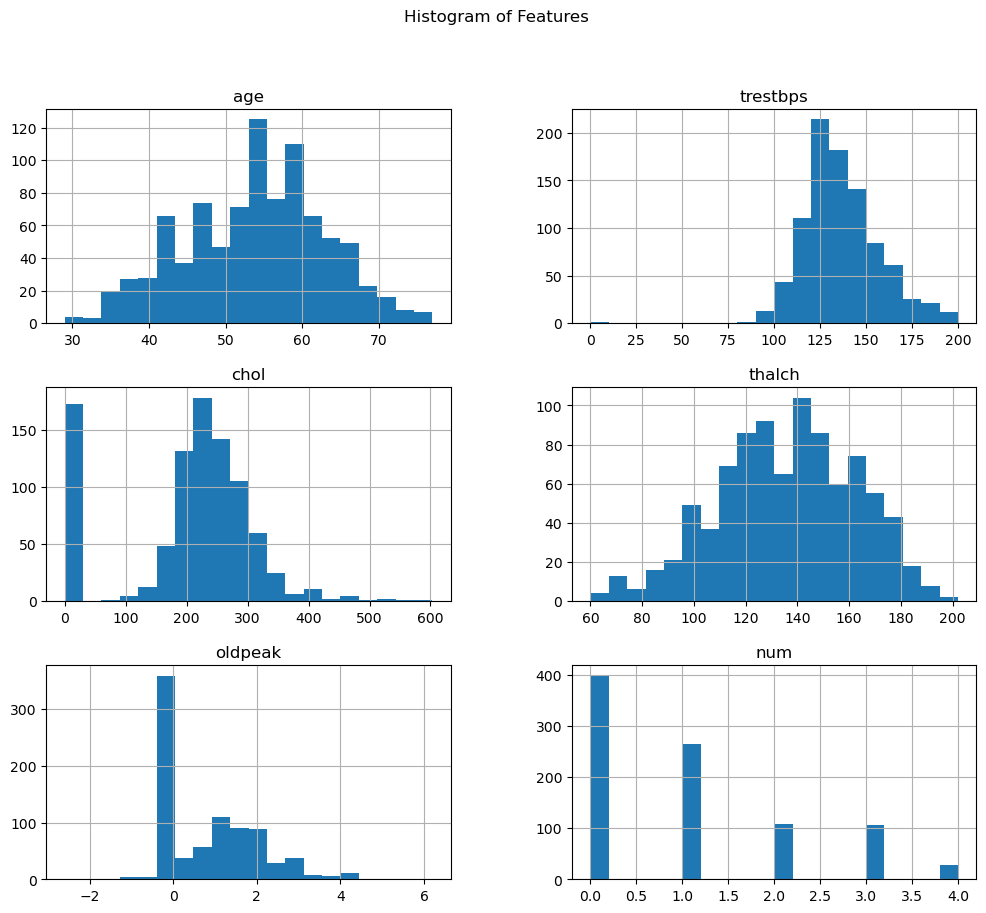

In [10]:
data.hist(bins=20, figsize=(12,10))
plt.suptitle('Histogram of Features')
plt.show()

* Boxplot

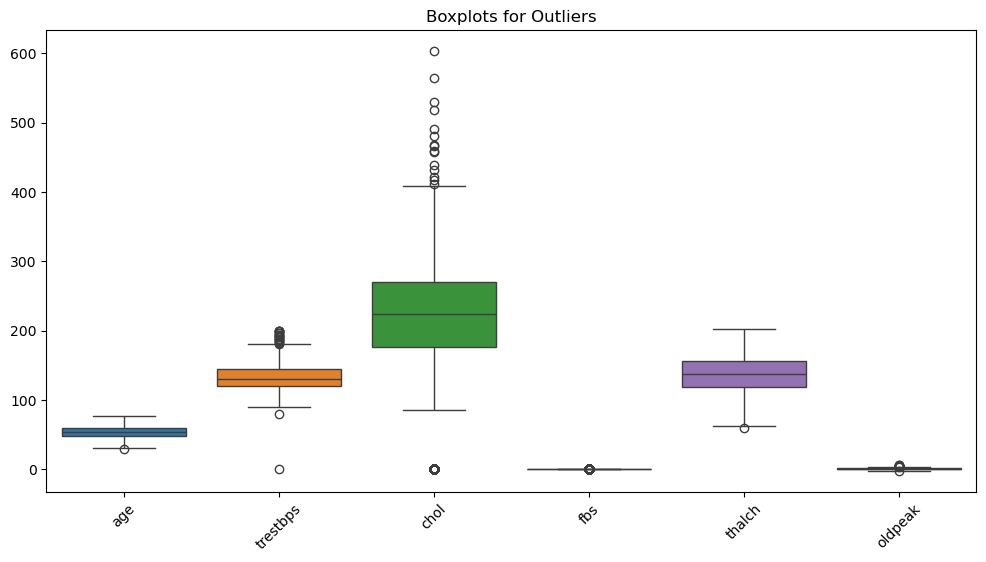

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.drop('num', axis=1))
plt.title('Boxplots for Outliers')
plt.xticks(rotation=45)
plt.show()

* Correlation

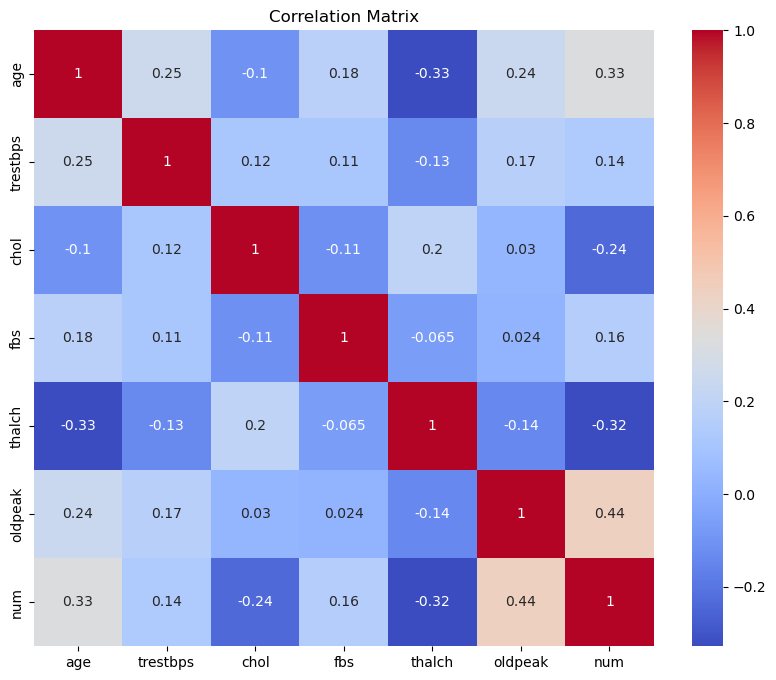

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Task 03: Feature Engineering

In [14]:
data = data.fillna(data.select_dtypes(include=[np.number]).median())

In [15]:
categorical_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [17]:
X = data.drop('num', axis=1)
y = data['num']

In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'oldpeak', 'num', 'exang_True', 'exang_FALSE', 'exang_TURE',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

# Task 04: Decision Tree Classification

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [29]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred = dt_model.predict(X_test)

In [33]:
print("\nClassification Report:\n", classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77        89
           1       0.37      0.35      0.36        48
           2       0.36      0.36      0.36        22
           3       0.15      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.53      0.53      0.53       182



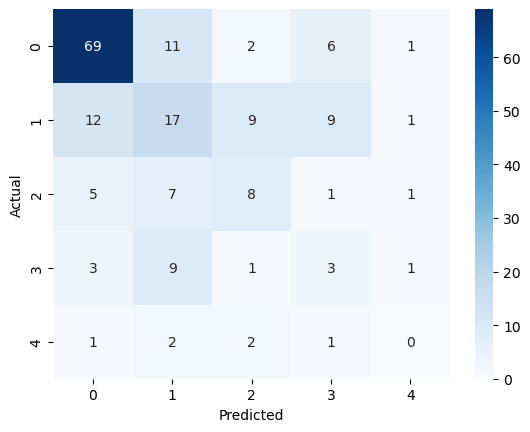

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Task 05: Hyperparameter Tuning

In [37]:
aram_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'criterion': ['gini', 'entropy']}

In [39]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("\nBest Params:", grid.best_params_)


Best Params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}


In [42]:
best_tree = grid.best_estimator_
best_tree.fit(X_train, y_train)
best_pred = best_tree.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, best_pred)
prec = precision_score(y_test, best_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, best_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, best_pred, average='weighted', zero_division=0)


In [45]:
print("Final Decision Tree Results:")
print("----------------------------")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

Final Decision Tree Results:
----------------------------
Accuracy  : 0.5275
Precision : 0.5121
Recall    : 0.5275
F1 Score  : 0.5174


In [47]:
print("Classification Report:",classification_report(y_test, best_pred, zero_division=0))

Classification Report:               precision    recall  f1-score   support

           0       0.76      0.74      0.75        89
           1       0.42      0.52      0.46        48
           2       0.14      0.09      0.11        22
           3       0.15      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.29      0.31      0.30       182
weighted avg       0.51      0.53      0.52       182



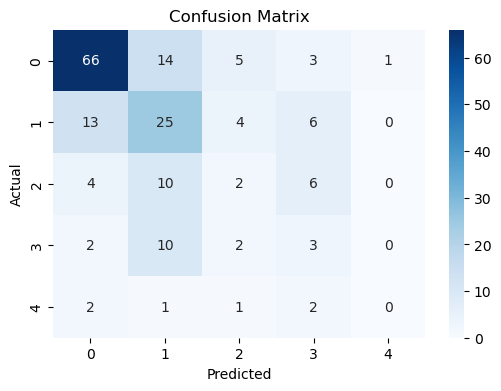

In [48]:
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# <b> Decision Tree Visualization </b>

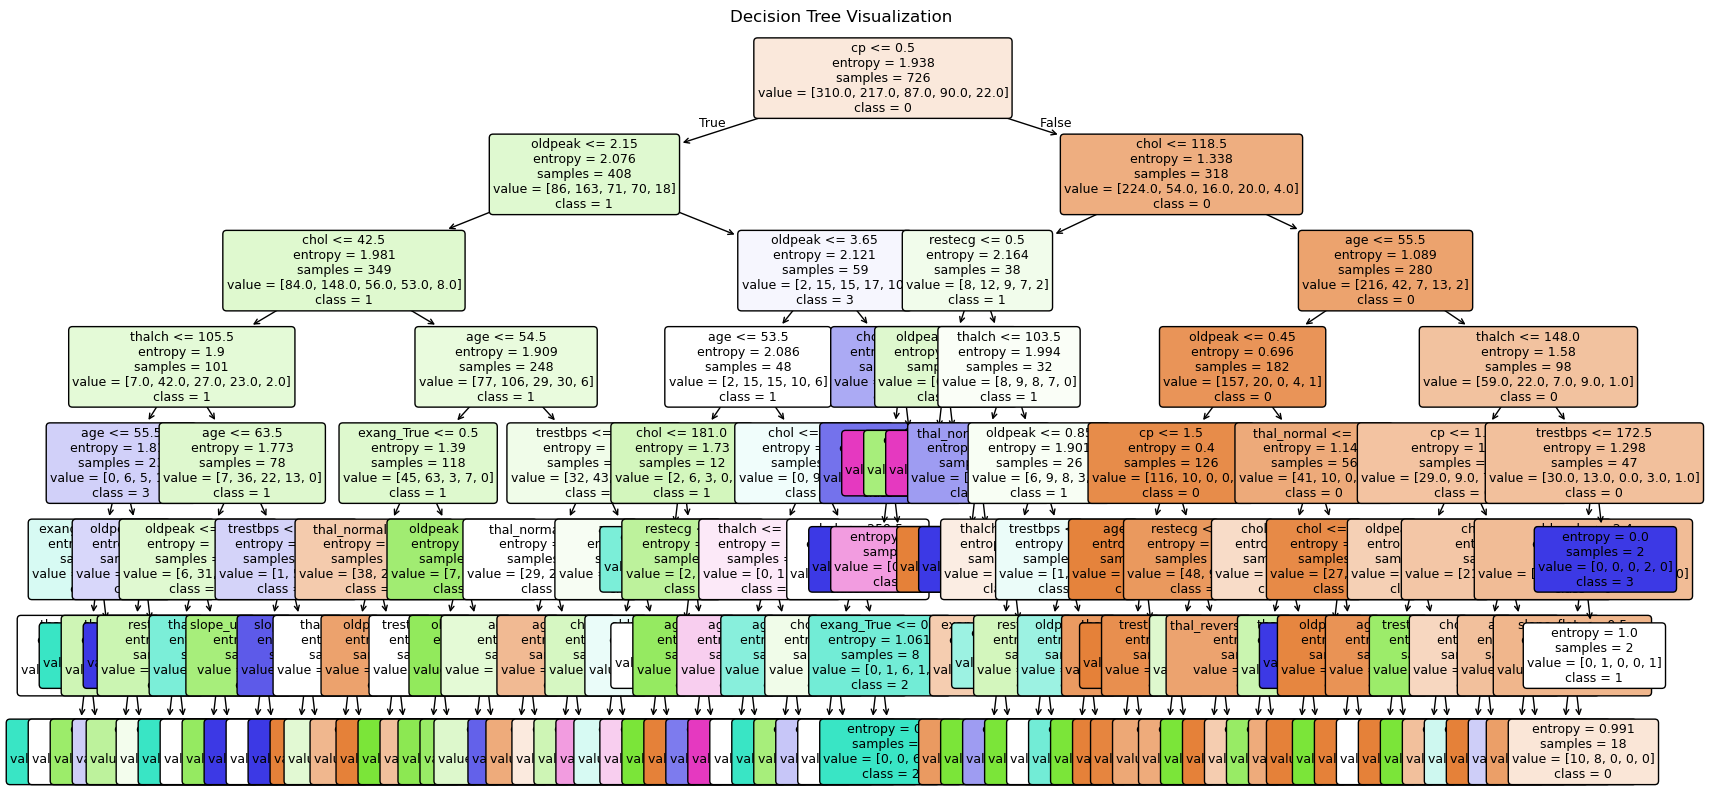

In [58]:
plt.figure(figsize=(20,10))
tree.plot_tree(
    best_tree,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree Visualization")
plt.show()

# Interview Questions

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

* The hyperparameters of a decision tree include the maximum size of the tree, the minimum number of instances required in a node for inducing a split, the node splitting criterion, and the amount of pruning. These hyperparameters play a crucial role in determining the performance of the decision tree model.
* If the maximumdepth is set too low, the model will not be able to learn the complex patterns in the data. This will lead to higher training error.
*  However, finding the optimal values for these hyperparameters can be challenging as there is no single setting that works equally well for different datasets

▶ HYPERPARAMETER TUNING:
+ When you’re training machine learning models, each dataset and model needs a different set of hyperparameters, which are a kind of variable.The only way to determine these is through multiple experiments, where you pick a set of hyperparameters and run them through your model.This is called hyperparameter tuning.
+  In essence, you're training your model sequentially with different sets of hyperparameters.
+  This process can be manual, or you can pick one of several automated hyperparameter tuning methods

### 2. What is the difference between the Label encoding and One-hot encoding?

#### Different Approaches to Categorical Encoding

▶ LABEL ENCODING:
* Label Encoding is a common technique for converting categorical variables into numerical values. 

* Each unique category value is assigned a unique integer based on alphabetical or numerical ordering.

▶ One HOT ENCODING:
* One-Hot Encoding is another popular technique for treating categorical variables.

* It simply creates additional features based on the number of unique values in the categorical feature.

* Every unique value in the category will be added as a feature. 

* One-Hot Encoding is the process of creating dummy variables.